# Import libraries

In [49]:
# Reload modules
%load_ext autoreload
%autoreload 2
# Inline plots
%matplotlib inline

# Standard
import numpy as np
import matplotlib.pyplot as plt
import time as time
from copy import deepcopy

# tf
import tensorflow as tf

# Mine
from utility import display_image, permutate
from model import Net

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set parameters

In [50]:
# Training
N_task = 3       # Number of tasks
N_epoch = 1      # Number of epochs
batch_size = 100 # Number of samples in each minibatch

# Network
hidden_size = 50       # Number of hidden layer neurons

# Regularization and Fisher
lambda_L2 = 0.2        # Regularization parameter for L2
lambda_EWC = 3         # Regularization parameter for EWC
sample_size_Fish = 200 # Number of samples to use to estimate Fisher Info.

# Miscellaneous


# Load data

In [51]:
# Extract dataset
dataset = tf.examples.tutorials.mnist.input_data \
    .read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


# Create permutated datasets

In [52]:
datasets = [dataset] # List of datasets

# Append permuted datasets
for i in range(N_task-1):
    datasets.append(permutate(dataset))

# Plot sample images

label = 0


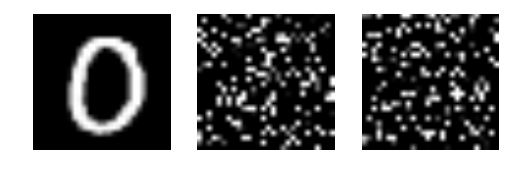

In [53]:
sample_index = 10      # Sample image to display
# Display label
label = datasets[0].train.labels[sample_index]
label = np.nonzero(label)[0][0]
print('label = ' + str(label))

# Display images
plt.figure()
for i in range(N_task):
    image = datasets[i].train.images[sample_index]

    plt.subplot(1,N_task,1+i)
    display_image(image)

# Create model

In [54]:
sess = tf.InteractiveSession() # Initialize session
# input and output placeholders
input_dim = datasets[0].train.images.shape[1]
output_dim = datasets[0].train.labels.shape[1]
x = tf.placeholder(tf.float32, shape=[None,input_dim])
y = tf.placeholder(tf.float32, shape=[None,output_dim])
# Instantiate model
model = Net(x,y,hidden_dim=50)
# Initialize variables
sess.run(tf.global_variables_initializer())

In [55]:
a=tf.constant(0.1,shape=[50])

In [57]:
x = tf.placeholder(tf.float32,shape=[None,10])

In [97]:
a=tf.random_uniform([5,3])

In [95]:
a.eval()

array([[ 0.07454729,  0.17905927,  0.22333789],
       [ 0.42571342,  0.96157467,  0.1684835 ],
       [ 0.05758154,  0.49559999,  0.44510806],
       [ 0.04890144,  0.36608946,  0.46527696],
       [ 0.39268041,  0.59188497,  0.59371495]], dtype=float32)